### Libraries

In [57]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('Dataset_clean_with_Title.csv')

In [3]:
df.head()

,Unnamed: 0,Titre,Editeur,Nombre_de_localisations,Nombre_de_prêt_total,Nombre_de_prêts_2017,Nombre_d'exemplaires,Aimé_Césaire,Amélie,André_Malraux,...,Vaugirard,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
0,0,La Politique étrangère en France | Texte impri...,Documentation française ;Ministère des affaire...,1,7.0,0,1,0.0,0.0,0.0,...,0.0,Unknown,Unknown,Unknown,Other,Book,2003,14,French,Other
1,1,Voyages en Sicile | Texte imprimé | Dominique ...,"Diderot éditeur, arts et sciences",1,16.0,0,1,0.0,0.0,0.0,...,0.0,Dominique Vivant Denon,Unknown,Unknown,Other,Book,1998,19,French,Other
2,2,0Voyages | [2] | Russie | Texte imprimé | Niko...,Plon,2,17.0,1,2,0.0,0.0,0.0,...,0.0,Níkos Kazantzákīs,Liliane Princet,Unknown,Other,Book,1977,40,French,Other
3,3,L'harmonica blues pour débutants | Texte imprimé,Emf,3,205.0,6,3,0.0,0.0,0.0,...,0.0,Mick Kinsella,Unknown,Unknown,Other,Partition,1997,20,French,Other
4,4,A letter to Amy | Texte imprimé | Ezra Jack Keats,Harper Trophy,2,87.0,3,2,0.0,0.0,0.0,...,0.0,Ezra Jack Keats,Unknown,Unknown,Other,Book,1984,33,English,Other


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.columns

Index(['Titre', 'Editeur', 'Nombre_de_localisations', 'Nombre_de_prêt_total',
       'Nombre_de_prêts_2017', 'Nombre_d'exemplaires', 'Aimé_Césaire',
       'Amélie', 'André_Malraux', 'Andrée_Chedid', 'Arthur_Rimbaud',
       'Assia_Djebar', 'Batignolles', 'Benjamin_Rabier', 'Buffon',
       'Canopée_-_la_fontaine', 'Chaptal', 'Charlotte_Delbo',
       'Claude_Lévi-Strauss', 'Colette_Vivier', 'Courcelles',
       'Couronnes_-_Naguib_Mahfouz', 'Crimée', 'Diderot', 'Drouot',
       'Edmond_Rostand', 'Europe', 'Faidherbe', 'Fessart', 'François_Villon',
       'Françoise_Sagan', 'Georges_Brassens', 'Germaine_Tillion', 'Glacière',
       'Goutte_d'Or', 'Gutenberg', 'Hélène_Berr', 'Hergé', 'Heure_Joyeuse',
       'Italie', 'Jacqueline_de_Romilly', 'Jean-Pierre_Melville', 'Lancry',
       'Louise_Michel', 'Marguerite_Audoux', 'Marguerite_Duras',
       'Marguerite_Yourcenar', 'Maurice_Genevoix', 'MMP', 'Mohammed_Arkoun',
       'Mortier', 'Musset', 'Oscar_Wilde', 'Parmentier', 'Place_des_Fêtes

In [6]:
# change French title to an English version
dct_col={'Titre':'Title', 
             'Editeur':'Initial_publisher', 
             'Nombre_de_localisations':'Number_locations',
             'Nombre_de_prêt_total':'Total_loans',
             'Nombre_de_prêts_2017':'Number_Loans_2017', 
             "Nombre_d'exemplaires":'Total_stock', }

In [7]:
df.columns=df.columns.map(lambda x: x if x not in dct_col.keys() else dct_col[x])

In [34]:
df.to_csv('Dataset_clean_Eng.csv')

In [10]:
todrop=list(df.iloc[:,6:65].columns)

In [11]:
df1=df.drop(todrop,axis=1)

In [12]:
df1.head()

,Title,Initial_publisher,Number_locations,Total_loans,Number_Loans_2017,Total_stock,Author,Author_secondary,Co_Author,Categories_stat,DocType,New_date,Age,Language,Publisher
0,La Politique étrangère en France | Texte impri...,Documentation française ;Ministère des affaire...,1,7.0,0,1,Unknown,Unknown,Unknown,Other,Book,2003,14,French,Other
1,Voyages en Sicile | Texte imprimé | Dominique ...,"Diderot éditeur, arts et sciences",1,16.0,0,1,Dominique Vivant Denon,Unknown,Unknown,Other,Book,1998,19,French,Other
2,0Voyages | [2] | Russie | Texte imprimé | Niko...,Plon,2,17.0,1,2,Níkos Kazantzákīs,Liliane Princet,Unknown,Other,Book,1977,40,French,Other
3,L'harmonica blues pour débutants | Texte imprimé,Emf,3,205.0,6,3,Mick Kinsella,Unknown,Unknown,Other,Partition,1997,20,French,Other
4,A letter to Amy | Texte imprimé | Ezra Jack Keats,Harper Trophy,2,87.0,3,2,Ezra Jack Keats,Unknown,Unknown,Other,Book,1984,33,English,Other


# Age distribution

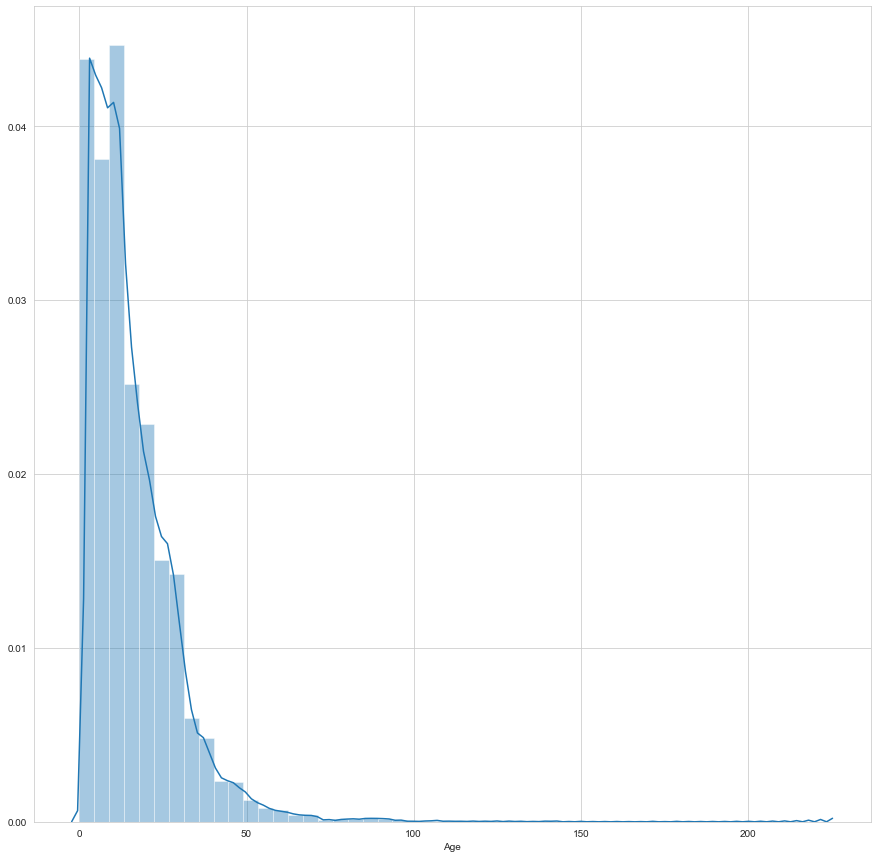

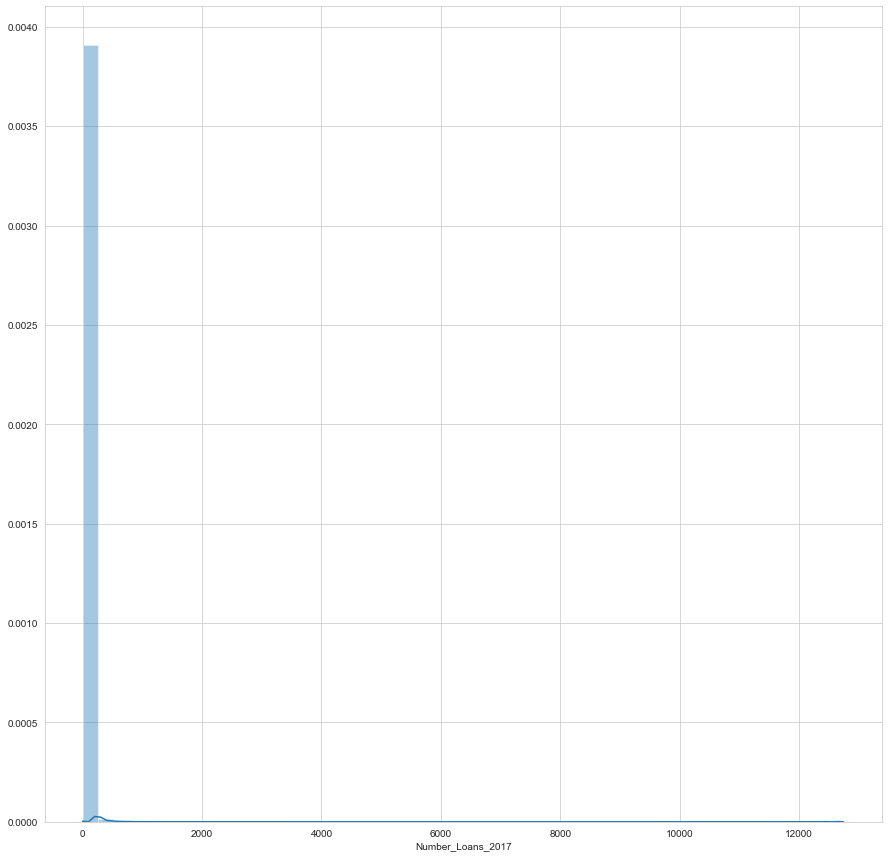

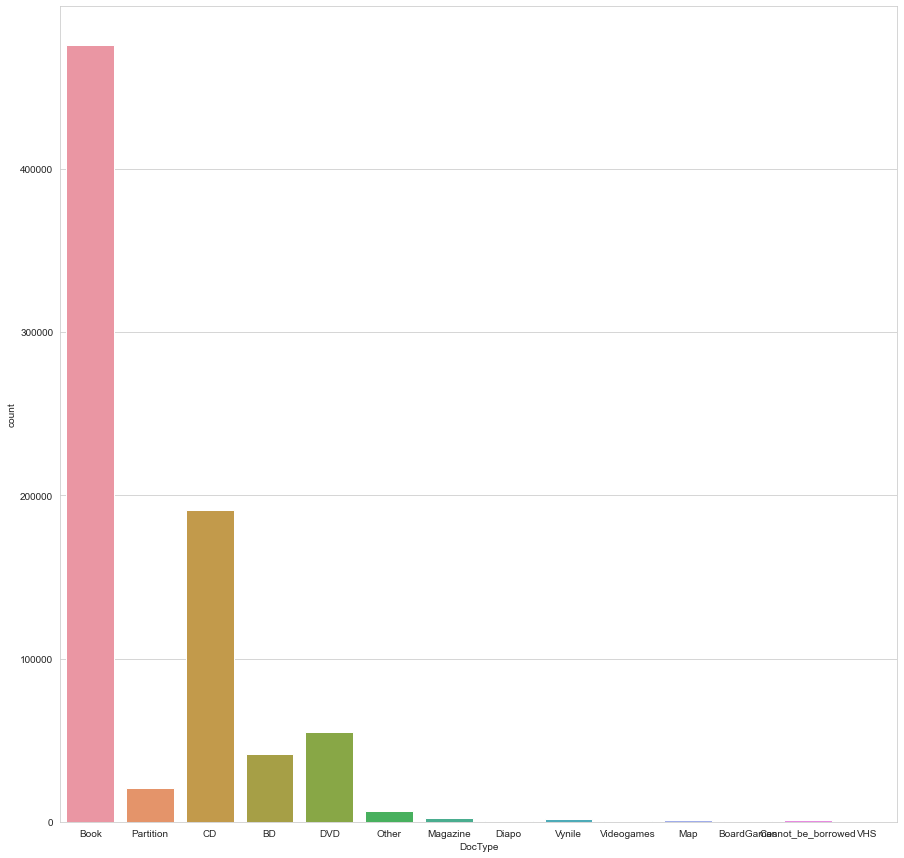

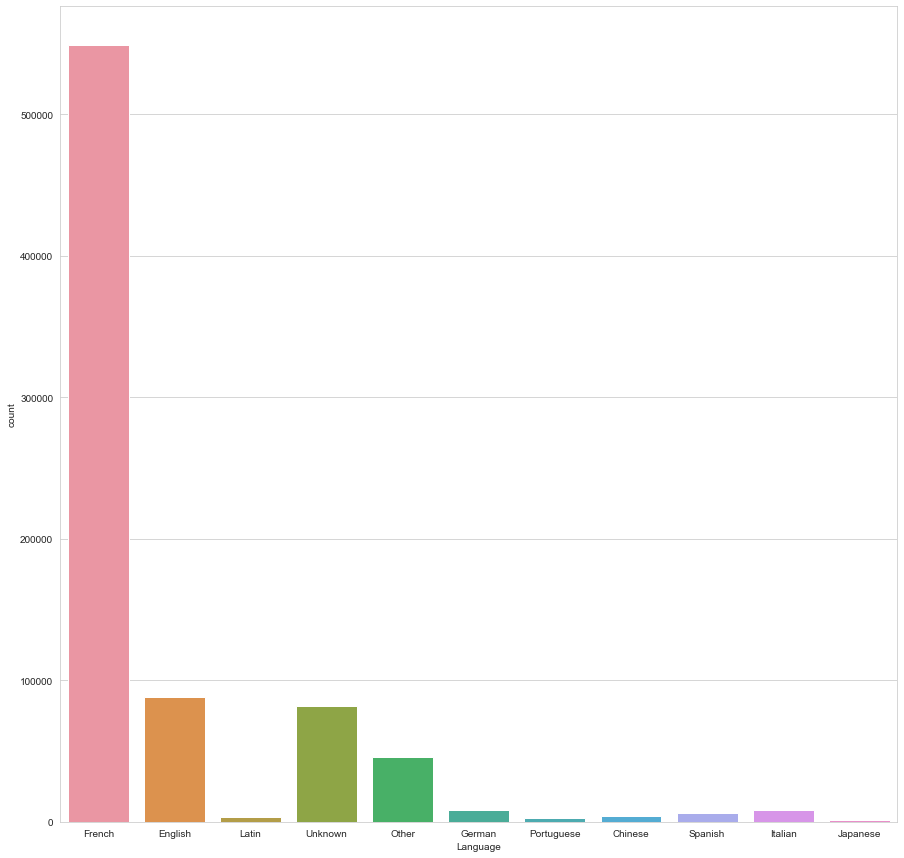

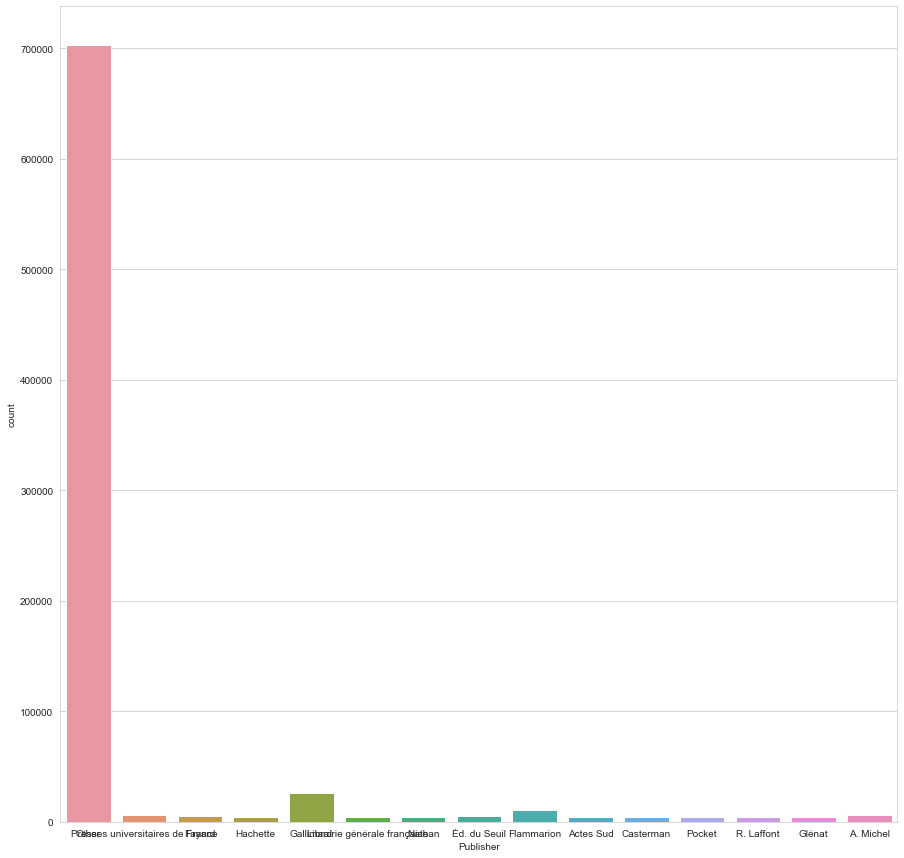

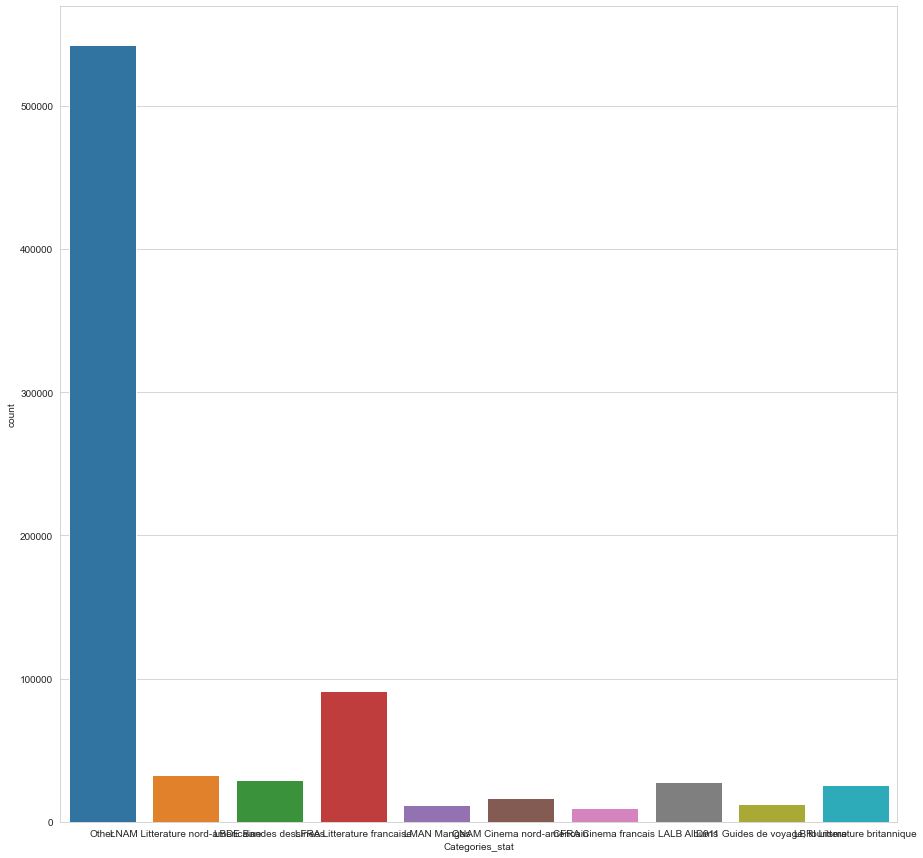

In [79]:
f,axes=plt.subplots(figsize=(15,15))
sns.distplot(df['Age'])
plt.show()
f,axes=plt.subplots(figsize=(15,15))
sns.distplot(df['Number_Loans_2017'])
plt.show()

f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['DocType'])
plt.show()
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Language'])
plt.show()
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Publisher'])
plt.show()
f,axes=plt.subplots(figsize=(15,15))
sns.countplot(df['Categories_stat'])
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='DocType'>

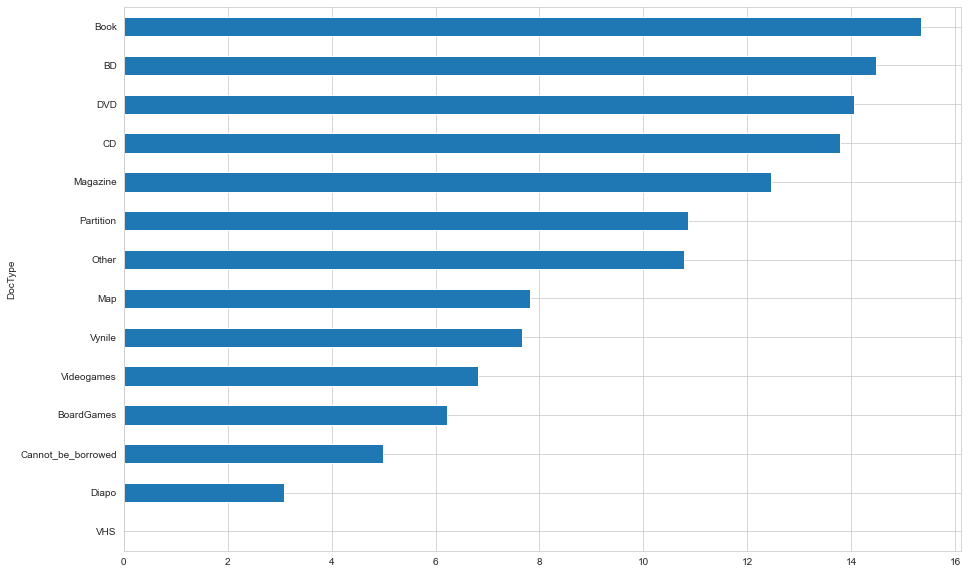

In [60]:
np.log(df.groupby('DocType')['Number_Loans_2017'].agg('sum').sort_values(ascending=True)).plot(kind='barh',figsize=(15,10))

In [82]:
#Function to make the bubble plots
def BubblePlot(col1,func,col2,col3):
    x = np.log(df.groupby(col1).agg(func)[col2])
    y = np.log(df.groupby(col1).agg(func)[col3])
    z = df.groupby(col1).agg(func).index
 
    # use the scatter function
    fig, axs = plt.subplots(figsize=(15,15)) 
    sns.scatterplot(x,y,hue=z,size=z,sizes=(200, 200),legend='full')
    plt.show()
    return None


#### Number of loans Vs. stock available by Doctype

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


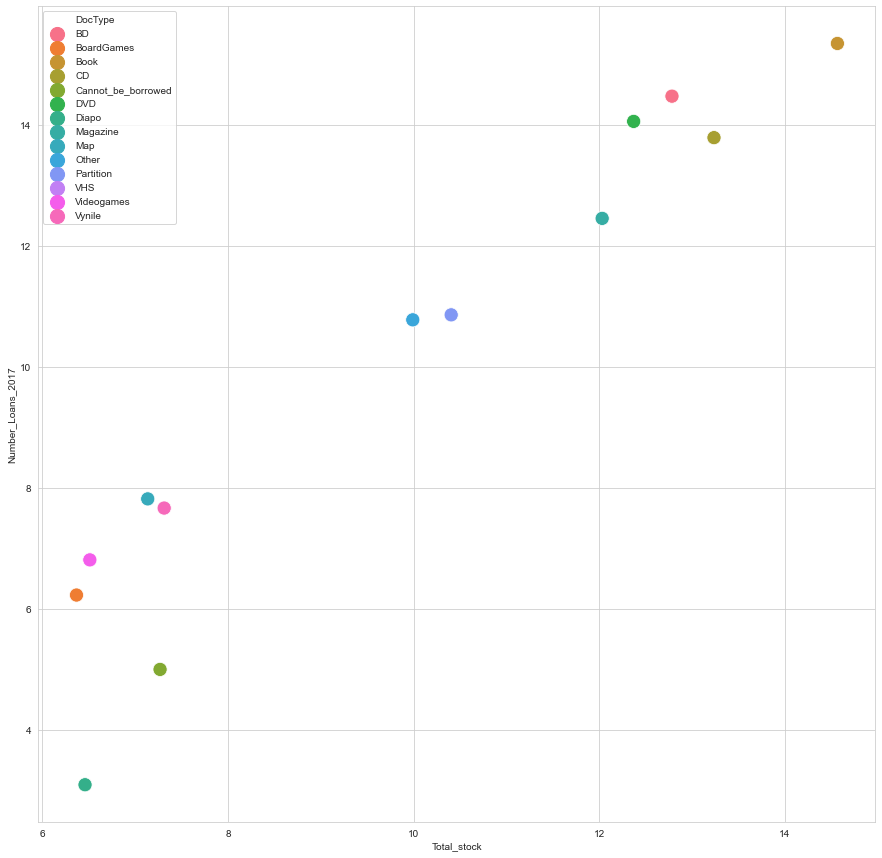

In [83]:
BubblePlot('DocType','sum','Total_stock','Number_Loans_2017')

In [98]:
def Loanrate(col1,func,col2,col3):
    dfdoc=df.groupby(col1).agg(func)[[col2,col3]]
    dfdoc['Loan_rate']=np.where(dfdoc[col2]!=0,dfdoc[col3]/dfdoc[col2],0).round(2)
    display(dfdoc)
    return None

In [99]:
#Number of loan per number of document in stock per doc type:
Loanrate('DocType','sum','Total_stock','Number_Loans_2017')

,Total_stock,Number_Loans_2017,Loan_rate
DocType,,,
BD,355983,1929154,5.42
BoardGames,582,506,0.87
Book,2116300,4610334,2.18
CD,559827,972013,1.74
Cannot_be_borrowed,1432,148,0.10
DVD,235592,1271208,5.40
Diapo,638,22,0.03
Magazine,167791,255931,1.53
Map,1254,2480,1.98


#### Number of loans Vs. stock available by Language

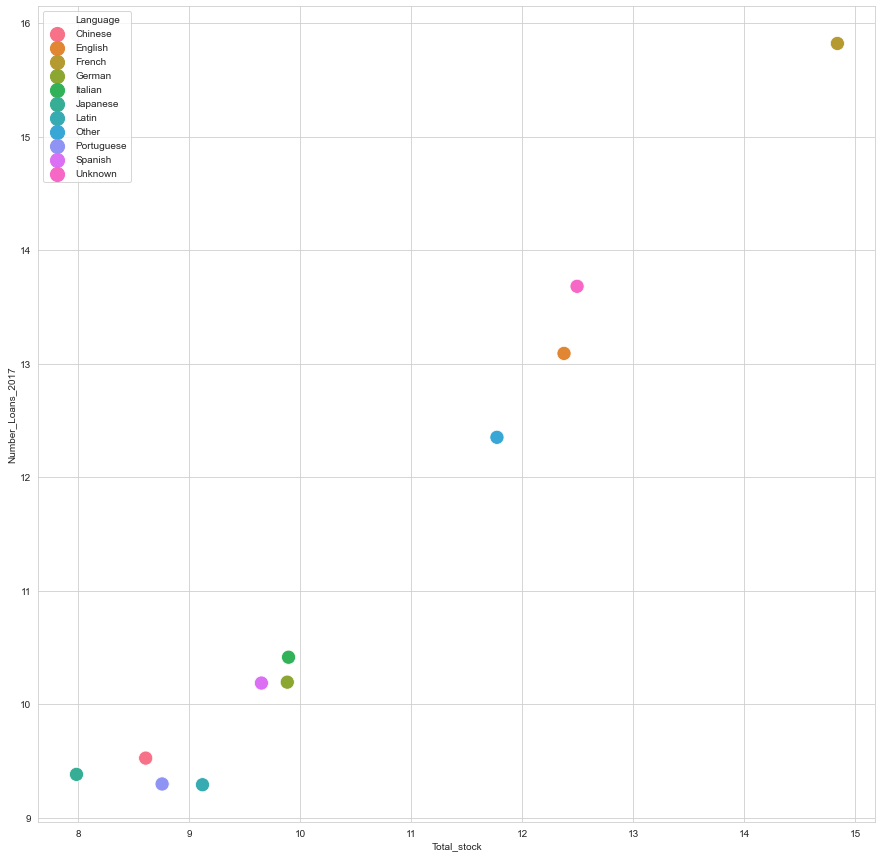

In [84]:
BubblePlot('Language','sum','Total_stock','Number_Loans_2017')

In [100]:
#Number of loan per number of document in stock per doc type:
Loanrate('Language','sum','Total_stock','Number_Loans_2017')

,Total_stock,Number_Loans_2017,Loan_rate
Language,,,
Chinese,5476,13691,2.50
English,237173,483874,2.04
French,2783908,7421924,2.67
German,19607,26728,1.36
Italian,19831,33299,1.68
Japanese,2936,11863,4.04
Latin,9135,10828,1.19
Other,129622,231080,1.78
Portuguese,6349,10901,1.72


#### Number of loans Vs. stock available by Publisher

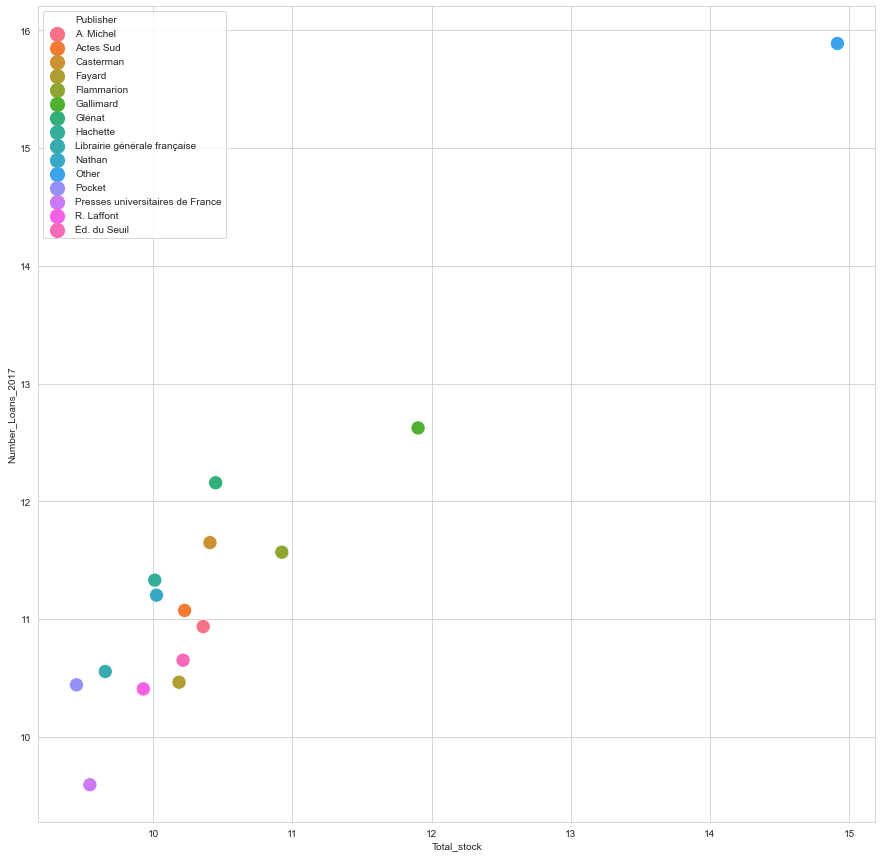

In [85]:
BubblePlot('Publisher','sum','Total_stock','Number_Loans_2017')

In [101]:
#Number of loan per number of document in stock per doc type:
Loanrate('Publisher','sum','Total_stock','Number_Loans_2017')

,Total_stock,Number_Loans_2017,Loan_rate
Publisher,,,
A. Michel,31562,56183,1.78
Actes Sud,27629,64395,2.33
Casterman,33150,114579,3.46
Fayard,26537,35004,1.32
Flammarion,55542,105653,1.90
Gallimard,147790,303600,2.05
Glénat,34526,190508,5.52
Hachette,22294,83312,3.74
Librairie générale française,15622,38331,2.45


#### Number of loans Vs. stock available by Categories_stat

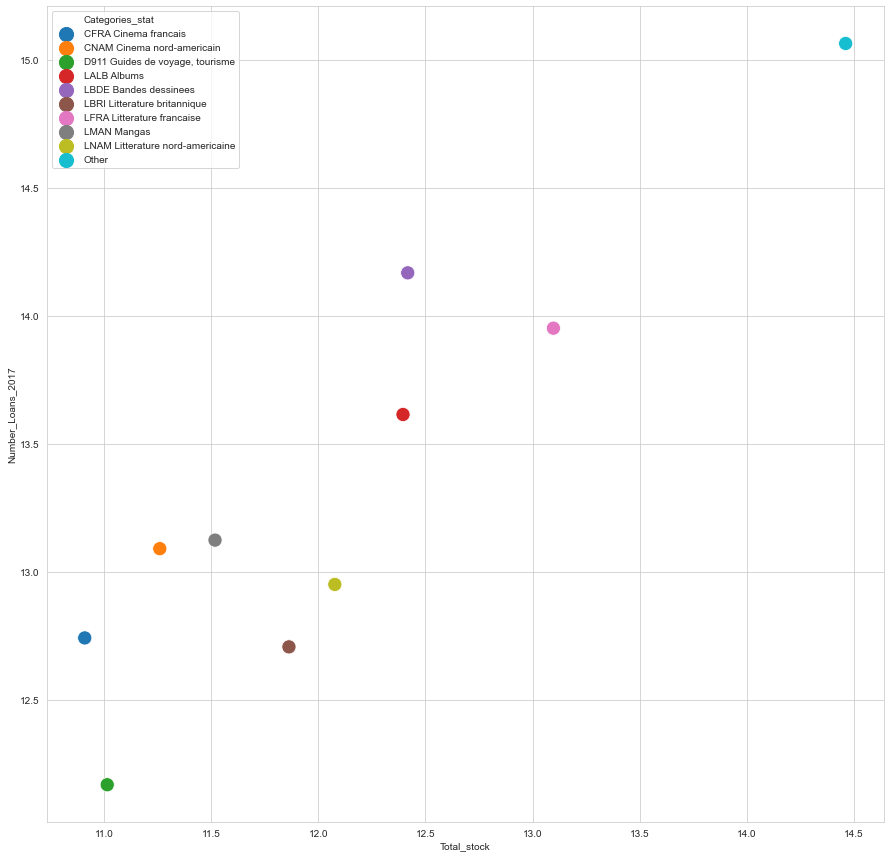

In [86]:
BubblePlot('Categories_stat','sum','Total_stock','Number_Loans_2017')

In [102]:
#Number of loan per number of document in stock per doc type:
Loanrate('Categories_stat','sum','Total_stock','Number_Loans_2017')

,Total_stock,Number_Loans_2017,Loan_rate
Categories_stat,,,
CFRA Cinema francais,54671,342119,6.26
CNAM Cinema nord-americain,77617,484745,6.25
"D911 Guides de voyage, tourisme",60717,192865,3.18
LALB Albums,241629,818477,3.39
LBDE Bandes dessinees,247022,1422852,5.76
LBRI Litterature britannique,141857,330380,2.33
LFRA Litterature francaise,487718,1146486,2.35
LMAN Mangas,100444,501210,4.99
LNAM Litterature nord-americaine,175742,421577,2.40


In [19]:

df[df.DocType=='Magazine']['Number_Loans_2017'].max()

12745

In [ ]:
df[df.DocType=='Book']['Number_Loans_2017'].max()

In [ ]:
#magazine le plus emprunté
df[(df.DocType=='Magazine')&(df['Number_Loans_2017']==12745.0)]

In [ ]:
df[(df.Titre=="J'aime lire")]["Total_stock"]

In [18]:
df[(df.Titre=="J'aime lire")]["Total_stock"]/54

AttributeError: 'DataFrame' object has no attribute 'Titre'

## Matching Librairies with there arrondissement in Paris

In [ ]:
Arr=pd.read_csv('BibliothequeParis.txt',sep=':')

In [ ]:
Arr.head()

In [ ]:
lib=Arr['librairies'].str.split(',',expand=True)

In [ ]:
lib2=lib.fillna(0)

In [ ]:
lib2

In [ ]:
lib

In [ ]:
lib.iloc[0].count()

In [ ]:
pop=pd.read_csv('pop_arrondissement_paris',sep=',')

In [ ]:
pop['NBlibrairies']=0
for i in range(20):
    pop['NBlibrairies'].iloc[i]=lib.iloc[i].count()
    i+=1

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
plt.barh(pop.arrondissement,pop.population/pop.NBlibrairies)
plt.title('Nb of people per librairies for each arrondissement')
plt.xlabel('Nb people/librairies')
plt.ylabel('N° of arrondissement')

In [ ]:
dflilb=dataBook.iloc[:,38:97]

In [ ]:
dflilb.sum().index

In [ ]:
"""
for i in range(lib2.shape[0]):
    for j in range(lib2.shape[1]):
        if lib2.iloc[i,j]==0:
            lib2.iloc[i,j]=0
        else:
            lib2.iloc[i,j]=dflilb.sum()(lib2.iloc[i,j])"""